# Task 5: <font color="#338CFF">House Price Prediction</font>

---

## Contribution: <font color="#b30000">Rajesh Patil (Individual)</font>

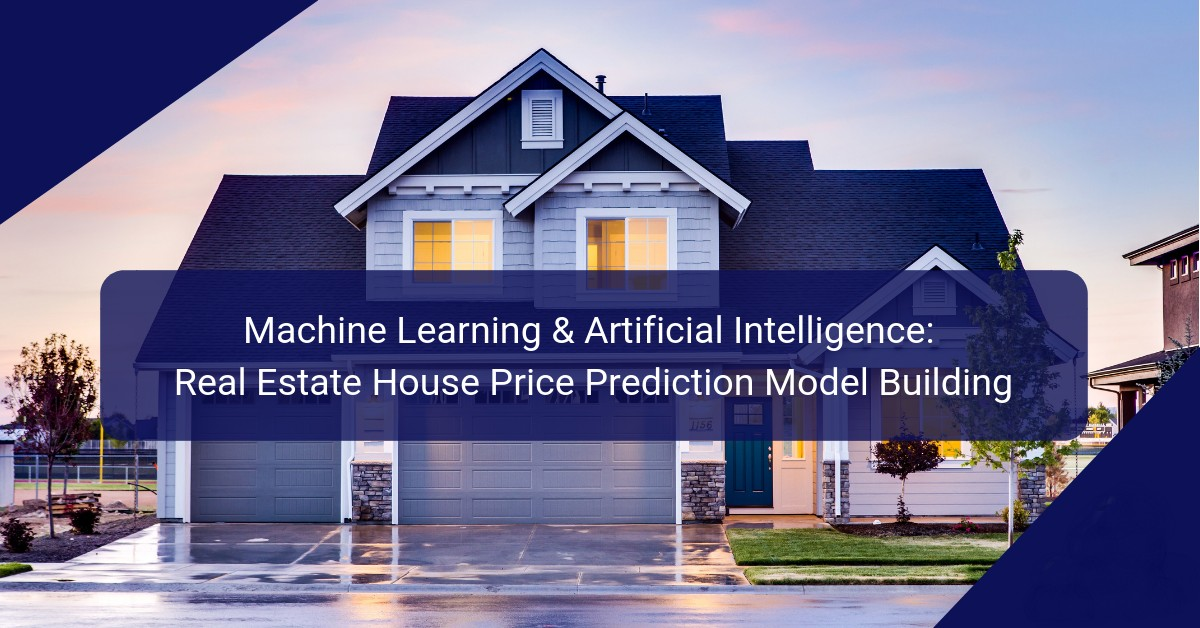

### <font color="#b30000">Step 1: Importing Libraries and Loading Dataset</font>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# Loading Dataset
df = pd.read_csv('BHP.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


### <font color="#b30000">Step 2: Data Preprocessing</font>

In [3]:
df.shape

(13320, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
## Checking the presence of duplicate records and dropping them.
check_duplicate = len(df[df.duplicated()])
if check_duplicate > 0:
   
    df = df.drop_duplicates()

    print(f"\033[1m{check_duplicate} duplicate record(s) found and dropped.\033[0m")
else:
    print("\033[1mNo duplicate records found.\033[0m")

529 duplicate record(s) found and dropped.


In [6]:
# Checking for null/missing values in dataset
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5328
total_sqft         0
bath              73
balcony          605
price              0
dtype: int64

In [7]:
# Handling the missing values
df.dropna(inplace=True)

In [8]:
df.isna().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [9]:
df.shape

(7144, 9)

In [10]:
# Dropping the columns as they are not closely related to the price prediction
df = df.drop(['availability','location','society'],axis=1)

In [11]:
df.head()

,area_type,size,total_sqft,bath,balcony,price
0,Super built-up Area,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,4 Bedroom,2600,5.0,3.0,120.00
3,Super built-up Area,3 BHK,1521,3.0,1.0,95.00
5,Super built-up Area,2 BHK,1170,2.0,1.0,38.00
11,Plot Area,4 Bedroom,2785,5.0,3.0,295.00


In [12]:
#converting the size column to size_bhk column
df['size_bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))

In [13]:
df.head()

,area_type,size,total_sqft,bath,balcony,price,size_bhk
0,Super built-up Area,2 BHK,1056,2.0,1.0,39.07,2
1,Plot Area,4 Bedroom,2600,5.0,3.0,120.00,4
3,Super built-up Area,3 BHK,1521,3.0,1.0,95.00,3
5,Super built-up Area,2 BHK,1170,2.0,1.0,38.00,2
11,Plot Area,4 Bedroom,2785,5.0,3.0,295.00,4


In [14]:
#dropping the size & area_type columns
df=df.drop(['size','area_type'],axis=1)

In [15]:
df.head()

,total_sqft,bath,balcony,price,size_bhk
0,1056,2.0,1.0,39.07,2
1,2600,5.0,3.0,120.00,4
3,1521,3.0,1.0,95.00,3
5,1170,2.0,1.0,38.00,2
11,2785,5.0,3.0,295.00,4


In [16]:
df.shape

(7144, 5)

In [17]:
# Converting the values in total squarefeet column to integers
def convert_sqft_into_int(x):
    token = x.split('-')
    if len(token) == 2:
        return (float(token[0]) + float(token[1])) / 2
    try:
        return float(x)
    except:
        return None

In [18]:
df['total_sqft'] = df['total_sqft'].apply(convert_sqft_into_int)

In [19]:
#checking for null values after the conversion
df.isna().sum()

total_sqft    15
bath           0
balcony        0
price          0
size_bhk       0
dtype: int64

In [21]:
#dropping the null values
df.dropna(inplace=True)

In [22]:
df.head()

,total_sqft,bath,balcony,price,size_bhk
0,1056.0,2.0,1.0,39.07,2
1,2600.0,5.0,3.0,120.00,4
3,1521.0,3.0,1.0,95.00,3
5,1170.0,2.0,1.0,38.00,2
11,2785.0,5.0,3.0,295.00,4


In [23]:
df.shape

(7129, 5)

### <font color="#b30000">Step 3: Exploratory Data Analysis (EDA)</font>

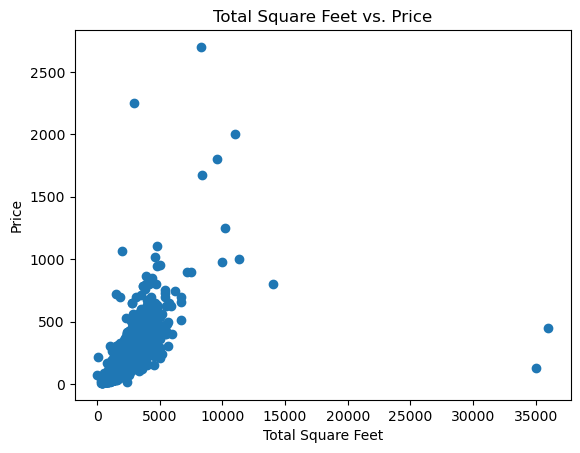

In [24]:
# Example scatter plot of 'total_sqft' vs. 'price'
plt.scatter(df['total_sqft'], df['price'])
plt.xlabel('Total Square Feet')
plt.ylabel('Price')
plt.title('Total Square Feet vs. Price')
plt.show()

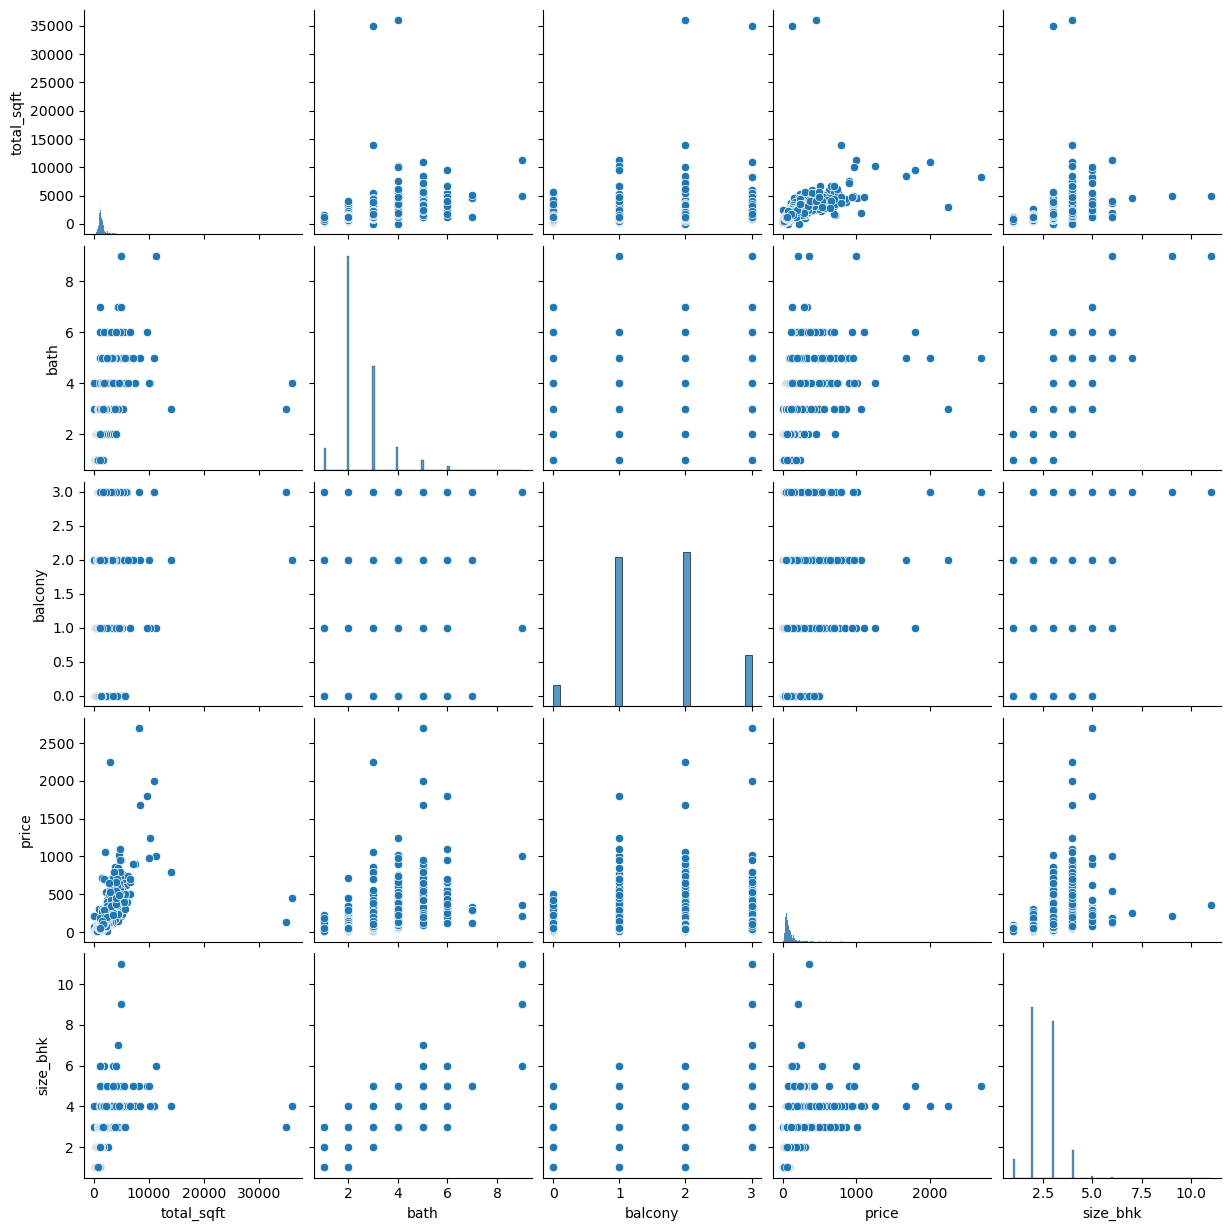

In [25]:
import seaborn as sns

# Create a pair plot of numerical features
sns.pairplot(df, vars=["total_sqft", "bath", "balcony", "price", "size_bhk"])
plt.show()

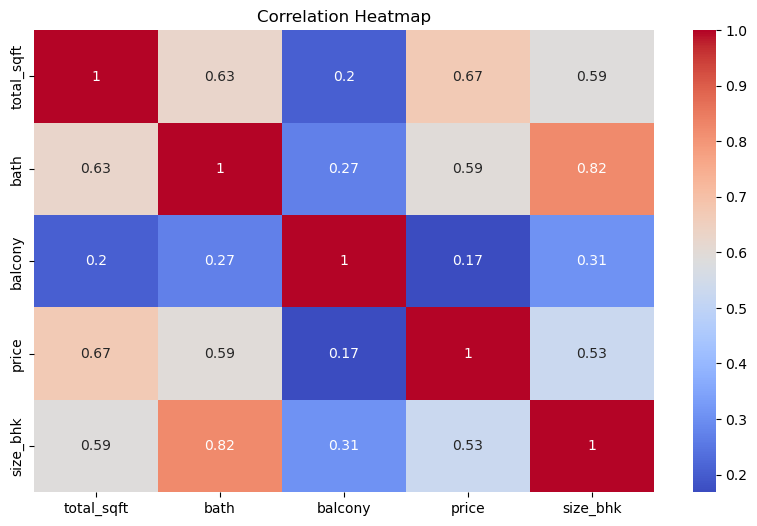

In [26]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

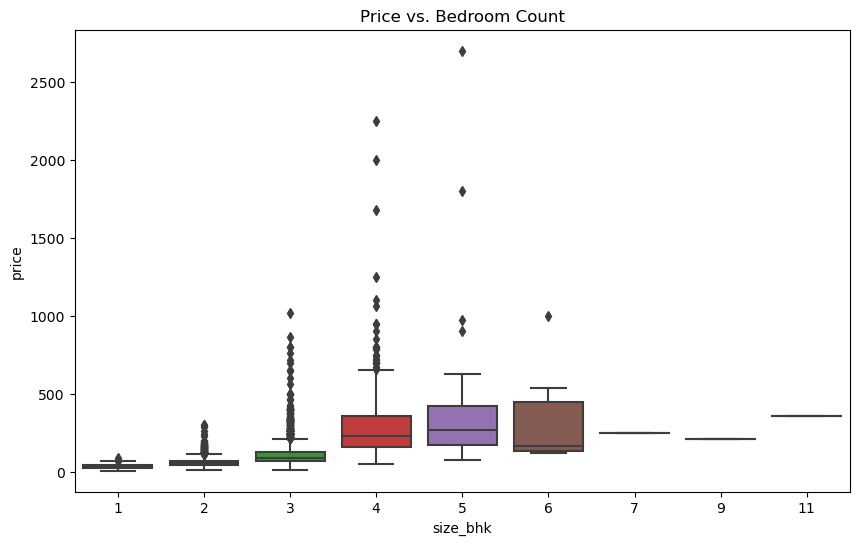

In [27]:
# Create box plots for key numerical features
plt.figure(figsize=(10, 6))
sns.boxplot(x="size_bhk", y="price", data=df)
plt.title("Price vs. Bedroom Count")
plt.show()

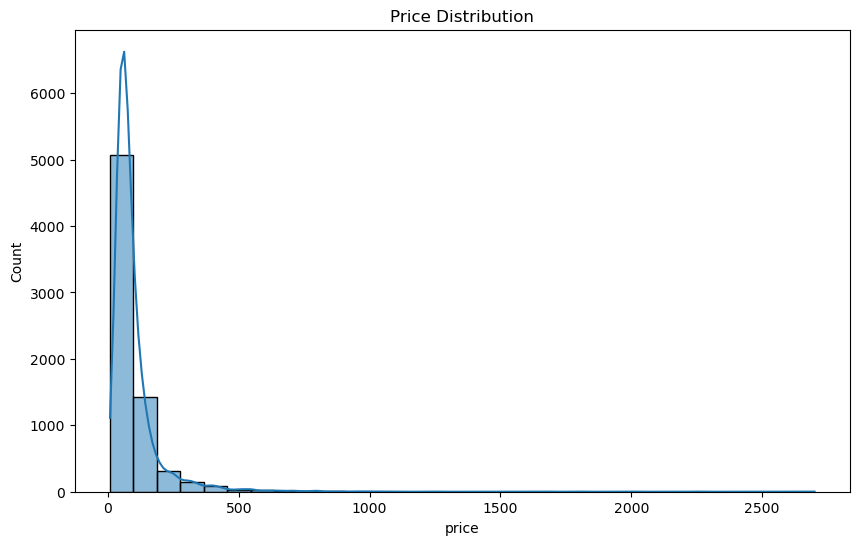

In [28]:
# Create histograms
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=30)
plt.title("Price Distribution")
plt.show()

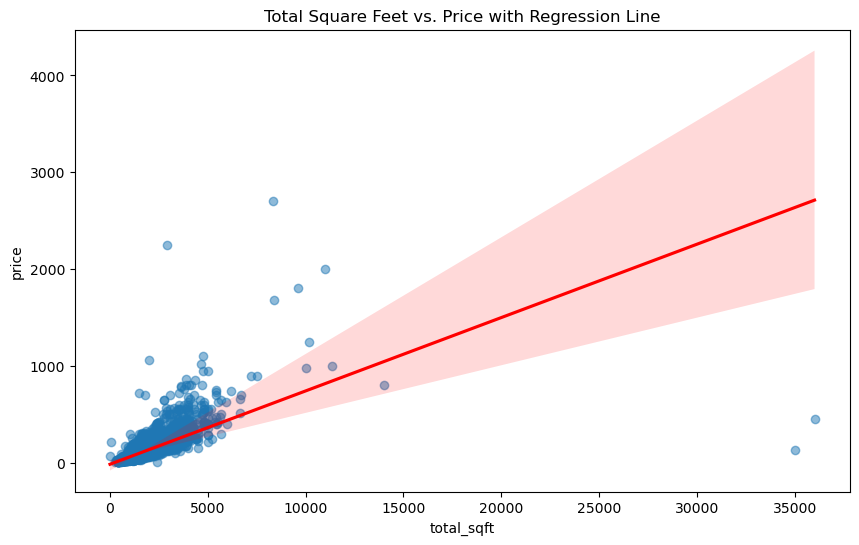

In [29]:
plt.figure(figsize=(10, 6))
sns.regplot(x="total_sqft", y="price", data=df, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.title("Total Square Feet vs. Price with Regression Line")
plt.show()

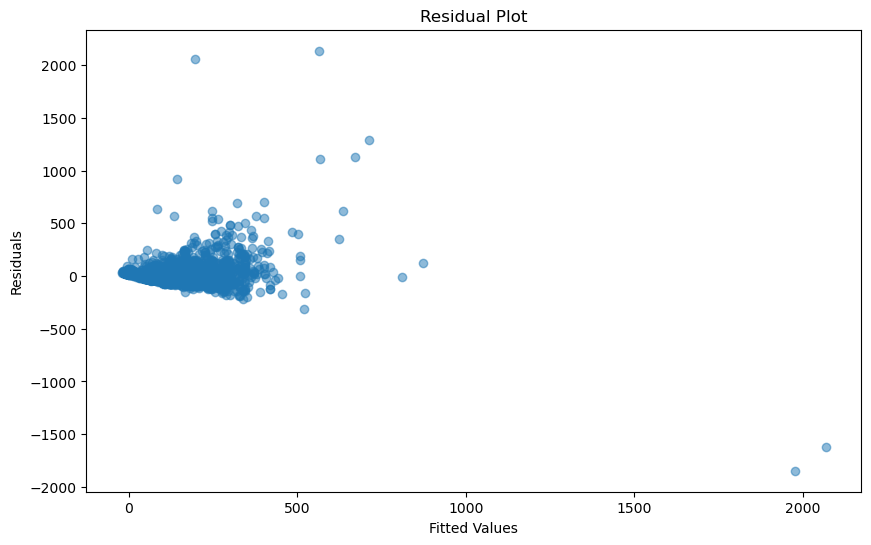

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import ProbPlot
import statsmodels.api as sm

# Define your feature matrix X and target variable y
X = df[['total_sqft', 'bath', 'balcony', 'size_bhk']]
y = df['price']

# Fit a linear regression model
X_const = sm.add_constant(X)  # Add a constant term for the intercept
model = sm.OLS(y, X_const).fit()
residuals = model.resid
QQ = ProbPlot(residuals)

# Create a residual plot
plt.figure(figsize=(10, 6))
plt.scatter(model.fittedvalues, residuals, alpha=0.5)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

### <font color="#b30000">Step 4: Feature Selection / Engineering</font>

In [34]:
#calculating the price per square feet as it will play a major role in predicting the price
df['price_per_sqft']=df['price'] * 100000 / df['total_sqft']

In [35]:
#dropping the balcony column
df=df.drop(['balcony'],axis=1)

In [36]:
df.head()

,total_sqft,bath,price,size_bhk,price_per_sqft
0,1056.0,2.0,39.07,2,3699.810606
1,2600.0,5.0,120.00,4,4615.384615
3,1521.0,3.0,95.00,3,6245.890861
5,1170.0,2.0,38.00,2,3247.863248
11,2785.0,5.0,295.00,4,10592.459605


In [37]:
df.shape

(7129, 5)

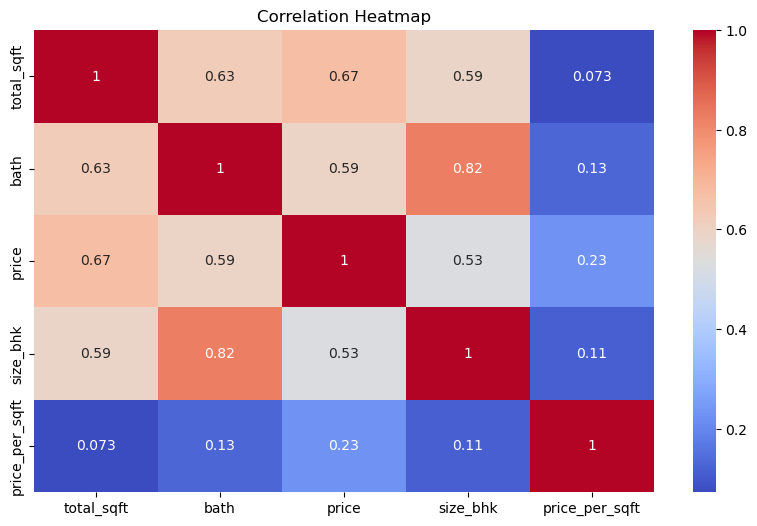

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

### OUTLIER TREATMENT

In [39]:
# Checking for outliers in newly created price per sq. feet column
df['price_per_sqft'].describe()

count      7129.000000
mean       6034.537656
std        9374.057592
min         371.428571
25%        4304.635762
50%        5345.911950
75%        6717.557252
max      672727.272727
Name: price_per_sqft, dtype: float64

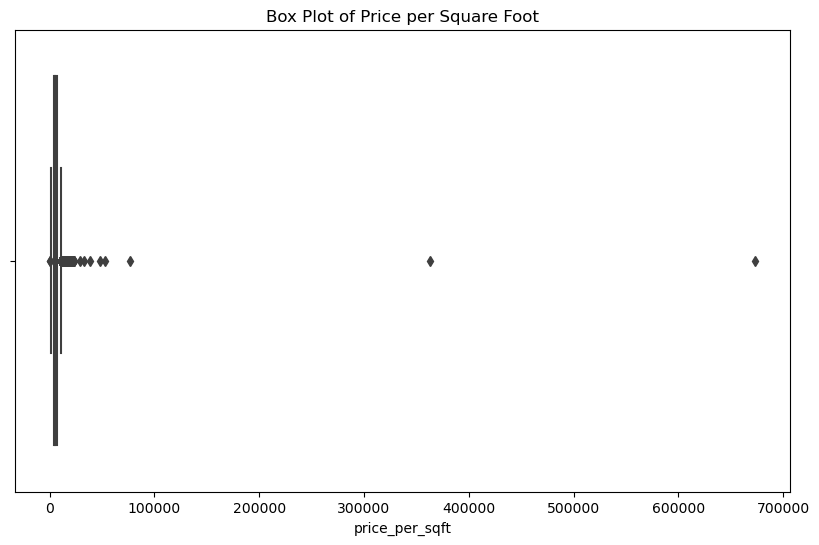

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot to visualize 'price_per_sqft'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price_per_sqft'])
plt.title("Box Plot of Price per Square Foot")
plt.show()

In [41]:
# Function to calculate outliers
def outlier_treatment(col):
    sorted(col)
    Q1,Q3 = np.percentile(col , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [44]:
#calculating the lower and upper range
lower_range,upper_range = outlier_treatment(df['price_per_sqft'])
print("\033[1mLower Range:\033[0m",lower_range)
print("\033[1mUpper Range:\033[0m",upper_range)

Lower Range: 685.2535261109142
Upper Range: 10336.939487386888


In [43]:
#outliers of lower range
lower_values = df[df["price_per_sqft"].values < lower_range]
lower_values

,total_sqft,bath,price,size_bhk,price_per_sqft
674,35000.0,3.0,130.0,3,371.428571
11748,2400.0,3.0,12.0,3,500.000000


In [45]:
# Outliers of upper range
upper_values = df[df["price_per_sqft"].values > upper_range]
upper_values

,total_sqft,bath,price,size_bhk,price_per_sqft
11,2785.0,5.0,295.0,4,10592.459605
18,2770.0,4.0,290.0,3,10469.314079
22,2800.0,5.0,380.0,4,13571.428571
57,1500.0,2.0,185.0,2,12333.333333
62,5700.0,5.0,650.0,4,11403.508772
...,...,...,...,...,...
13180,3124.0,6.0,349.0,4,11171.574904
13233,1903.0,2.0,293.0,3,15396.741986
13262,1140.0,1.0,185.0,2,16228.070175
13290,4050.0,2.0,450.0,4,11111.111111


In [46]:
# Total outliers
lower_outliers = lower_values.value_counts().sum(axis=0)
upper_outliers = upper_values.value_counts().sum(axis=0)
total_outliers = lower_outliers + upper_outliers

print("\033[1mTotal Number of Outliers:\033[0m",total_outliers)

Total Number of Outliers: 382


In [47]:
# Index that contains outliers

lower_index = list(df[df['price_per_sqft'] < lower_range ].index)

upper_index = list(df[df['price_per_sqft'] > upper_range ].index)

total_index = list(lower_index + upper_index)

print(total_index)

[674, 11748, 11, 18, 22, 57, 62, 107, 225, 260, 324, 349, 373, 407, 451, 465, 474, 480, 483, 583, 584, 639, 649, 666, 672, 685, 719, 736, 749, 913, 937, 950, 958, 965, 1065, 1124, 1146, 1165, 1176, 1177, 1217, 1255, 1296, 1311, 1341, 1398, 1405, 1442, 1443, 1504, 1569, 1633, 1665, 1693, 1730, 1774, 1776, 1839, 1847, 1931, 1952, 2004, 2010, 2066, 2238, 2282, 2313, 2331, 2341, 2370, 2426, 2428, 2430, 2593, 2627, 2660, 2667, 2682, 2783, 2911, 2952, 2959, 2981, 3030, 3062, 3072, 3097, 3100, 3117, 3118, 3138, 3151, 3154, 3180, 3193, 3227, 3231, 3289, 3302, 3460, 3484, 3525, 3653, 3654, 3662, 3669, 3697, 3806, 3829, 3866, 3918, 4034, 4189, 4243, 4249, 4263, 4313, 4338, 4371, 4373, 4463, 4498, 4602, 4629, 4632, 4642, 4734, 4753, 4780, 4789, 4828, 4855, 4889, 4891, 4928, 4953, 4962, 5022, 5031, 5058, 5096, 5273, 5300, 5313, 5367, 5444, 5473, 5483, 5519, 5582, 5595, 5606, 5618, 5679, 5695, 5717, 5728, 5799, 5925, 5939, 5975, 5984, 5987, 6028, 6051, 6054, 6055, 6097, 6125, 6128, 6150, 6176, 6188

In [48]:
print("\033[1mShape Before Dropping Outlier Rows:\033[0m", df.shape)

df.drop(total_index, inplace = True)

print("\033[1mShape After Dropping Outlier Rows:\033[0m", df.shape)

Shape Before Dropping Outlier Rows: (7129, 5)
Shape After Dropping Outlier Rows: (6747, 5)


In [49]:
df.head()

,total_sqft,bath,price,size_bhk,price_per_sqft
0,1056.0,2.0,39.07,2,3699.810606
1,2600.0,5.0,120.00,4,4615.384615
3,1521.0,3.0,95.00,3,6245.890861
5,1170.0,2.0,38.00,2,3247.863248
12,1000.0,2.0,38.00,2,3800.000000


In [50]:
# Function used to check how the columns are correlated with each other
df.corr()

,total_sqft,bath,price,size_bhk,price_per_sqft
total_sqft,1.000000,0.673490,0.801866,0.634483,0.309763
bath,0.673490,1.000000,0.719157,0.816272,0.364848
price,0.801866,0.719157,1.000000,0.630894,0.687046
size_bhk,0.634483,0.816272,0.630894,1.000000,0.278173
price_per_sqft,0.309763,0.364848,0.687046,0.278173,1.000000


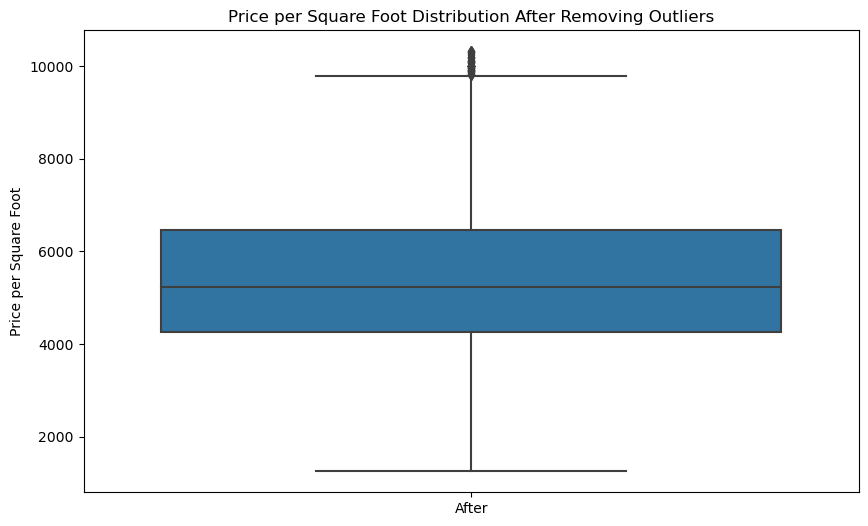

In [53]:
# Create a box plot to compare 'price_per_sqft' before and after removing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=[df['price_per_sqft']], orient='v')
plt.title("Price per Square Foot Distribution After Removing Outliers")
plt.xticks([0], ['After'])
plt.ylabel("Price per Square Foot")
plt.show()

In [54]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
columns_to_scale = ['total_sqft', 'bath', 'size_bhk', 'price_per_sqft']

df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [55]:
df.head()

,total_sqft,bath,price,size_bhk,price_per_sqft
0,0.021615,0.125,39.07,0.1,0.270024
1,0.064845,0.500,120.00,0.3,0.370940
3,0.034634,0.250,95.00,0.2,0.550658
5,0.024807,0.125,38.00,0.1,0.220209
12,0.020047,0.125,38.00,0.1,0.281067


### <font color="#b30000">Step 5: Split the Data</font>

In [57]:
from sklearn.model_selection import train_test_split

# Define your features (X) and target (y)
X = df.drop('price', axis=1)  # Features
y = df['price']  # Target variable

# Split the data into training and testing sets (adjust test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting datasets
print("\033[1mTraining data shape:\033[0m", X_train.shape, y_train.shape)
print("\033[1mTesting data shape:\033[0m", X_test.shape, y_test.shape)

Training data shape: (5397, 4) (5397,)
Testing data shape: (1350, 4) (1350,)


### <font color="#b30000">Step 6: Model Selection, Training and Evaluation</font>

In [61]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

# Define regression models
lr_model = LinearRegression()
ridge_model = Ridge()
lasso_model = Lasso()
svr_model = SVR()
knn_model = KNeighborsRegressor()
dt_model = DecisionTreeRegressor()
rf_model = RandomForestRegressor()
xgb_model = XGBRegressor()
mlp_model = MLPRegressor()

# Create an empty dictionary to store cross-validation results
cv_results = {'Model': [], 'CV RMSE Mean': [], 'CV RMSE Std': [], 'CV R-squared Mean': []}

# Define models and evaluate them
models = [lr_model, ridge_model, lasso_model, svr_model, knn_model, dt_model, rf_model, xgb_model, mlp_model]

for model in models:
    model_name = model.__class__.__name__
    # Perform cross-validation
    cv_rmse = np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=10))
    cv_r2 = cross_val_score(model, X_train, y_train, scoring="r2", cv=10)
    
    # Append results to the dictionary
    cv_results['Model'].append(model_name)
    cv_results['CV RMSE Mean'].append(cv_rmse.mean())
    cv_results['CV RMSE Std'].append(cv_rmse.std())
    cv_results['CV R-squared Mean'].append(cv_r2.mean())

# Convert cross-validation results to a DataFrame
cv_results_df = pd.DataFrame(cv_results)

# Print the results
print("\033[1mEvaluation Metrics:\033[0m")
cv_results_df.sort_values(by='CV RMSE Mean')

C:\Users\07pat\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\07pat\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\07pat\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\07pat\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\07pat\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

Evaluation Metrics:


C:\Users\07pat\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,Model,CV RMSE Mean,CV RMSE Std,CV R-squared Mean
7,XGBRegressor,3.365145,1.528640,0.996125
6,RandomForestRegressor,4.590711,2.862270,0.992643
5,DecisionTreeRegressor,7.330974,4.054517,0.985441
0,LinearRegression,11.993678,1.433922,0.959570
4,KNeighborsRegressor,18.373077,6.633135,0.901810
1,Ridge,21.174514,4.410876,0.874864
8,MLPRegressor,26.326683,5.042566,0.804015
2,Lasso,32.528342,6.415428,0.705870
3,SVR,32.759148,7.429601,0.700501


## <font color="#338CFF">Conclusion :</font>

Based on the cross-validation results, the __XGBoostRegressor__ seems to be the __best-performing model__ with the __lowest RMSE mean and the highest R-squared mean__.

### <font color="#b30000">Step 7: Visualizing Model Performance</font>

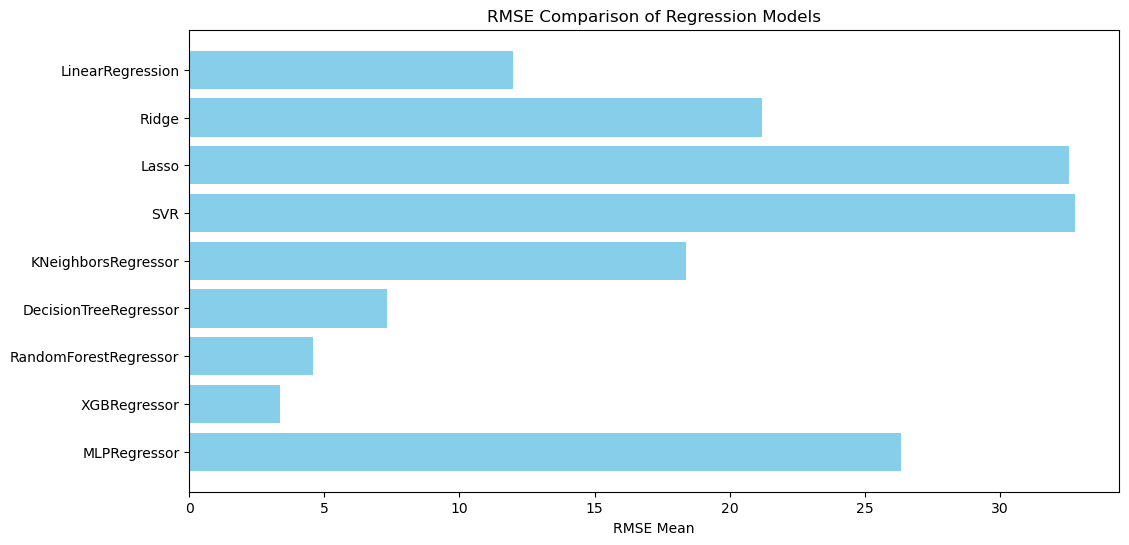

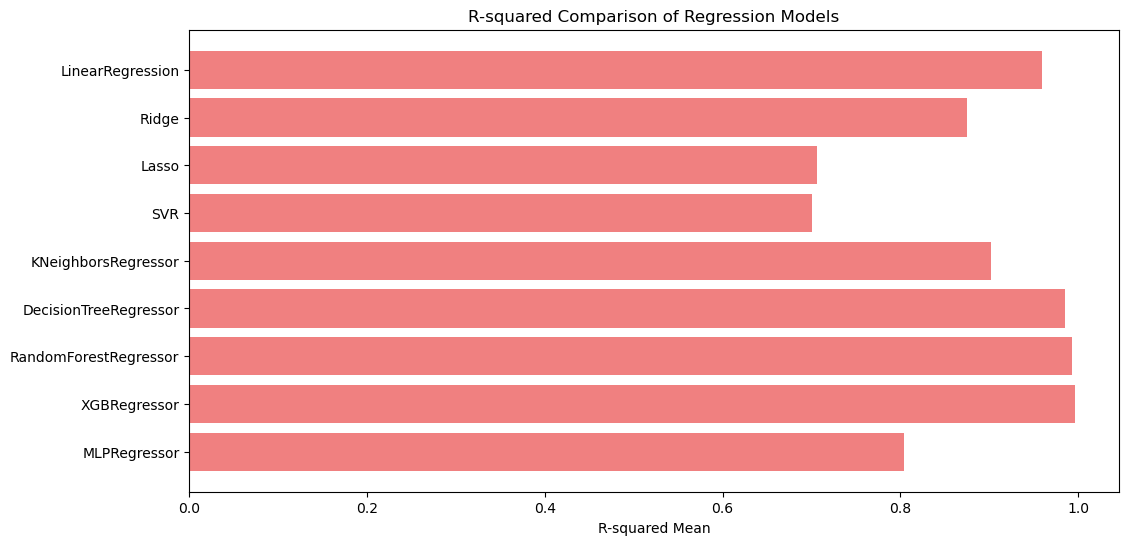

In [64]:
# Bar chart for RMSE comparison
plt.figure(figsize=(12, 6))
plt.barh(cv_results_df['Model'], cv_results_df['CV RMSE Mean'], color='skyblue')
plt.xlabel('RMSE Mean')
plt.title('RMSE Comparison of Regression Models')
plt.gca().invert_yaxis()
plt.show()

# Bar chart for R-squared comparison
plt.figure(figsize=(12, 6))
plt.barh(cv_results_df['Model'], cv_results_df['CV R-squared Mean'], color='lightcoral')
plt.xlabel('R-squared Mean')
plt.title('R-squared Comparison of Regression Models')
plt.gca().invert_yaxis()
plt.show()

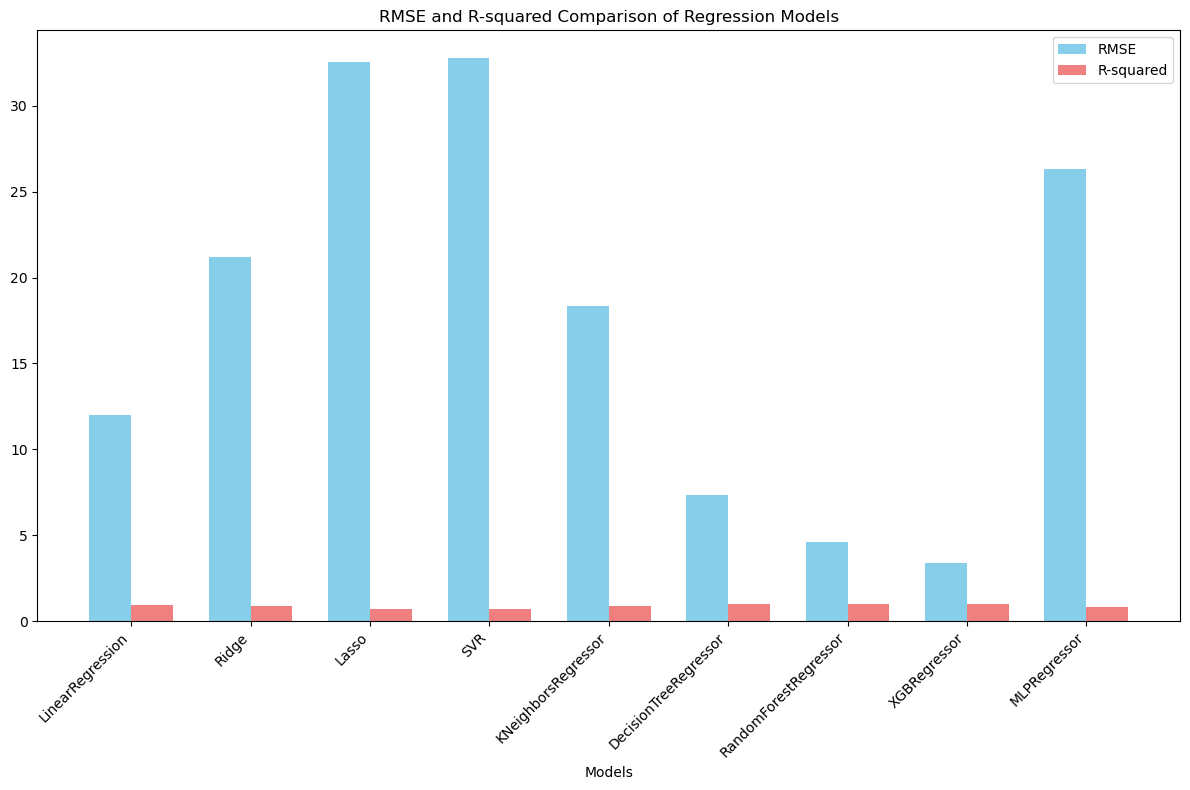

In [63]:
# Define data for models and their performance metrics
models = cv_results_df['Model']
rmse_means = cv_results_df['CV RMSE Mean']
r_squared_means = cv_results_df['CV R-squared Mean']

# Create a bar chart for both RMSE and R-squared values
fig, ax = plt.subplots(figsize=(12, 8))
width = 0.35
x = np.arange(len(models))

bar1 = ax.bar(x - width/2, rmse_means, width, label='RMSE', color='skyblue')
bar2 = ax.bar(x + width/2, r_squared_means, width, label='R-squared', color='lightcoral')

# Add labels, title, and legend
ax.set_xlabel('Models')
ax.set_title('RMSE and R-squared Comparison of Regression Models')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend()

# Display the graph
plt.tight_layout()
plt.show()

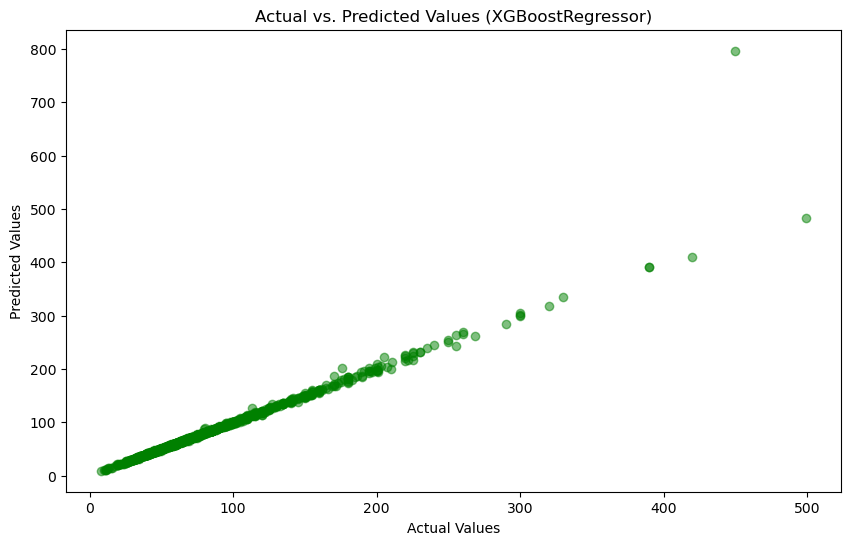

In [65]:
# Scatter plot for actual vs. predicted values for XGBoostRegressor
best_model = XGBRegressor()
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, c='green', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (XGBoostRegressor)')
plt.show()

### <font color="#b30000">Step 8: Model Saving</font>

In [66]:
import pickle

# Assuming you have a best_model variable that holds the best performing model
best_model = XGBRegressor()

# Save the best model to a file
with open('best_model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)

## <font color="#338CFF">Thank You..</font>